# **Network Attacks Detection**

*Dataset: KDD Cup 1999*
* [Data Description](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html)




## Data Settings

Setting upzip folder

In [4]:
FOLDER_PATH = r'data/kdd-cup-1999/'

*If error occurs: please unzip the .zip file data first*

Checking

In [5]:
import os 
os.listdir(FOLDER_PATH)[:3]

['corrected', 'corrected.gz', 'kddcup.data']

## Necessary Libraries

In [6]:
import numpy as np

import gc; gc.enable() #Enable garbage for the notebook

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time


import warnings

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split




warnings.filterwarnings("ignore")

## Exploratory Data Analysis

### Data Loading

In [7]:
def load_data():
    
    f=open(FOLDER_PATH +"kddcup.names",'r')
    data=f.readlines()[1:]

    column_names=[]
    for line in data:
        column_names.append(line.split(':')[0])

    column_names.append('target')
    f.close()

    f=open(FOLDER_PATH + "training_attack_types","r")
    data=f.readlines()[:-1]

    attack_type_mapping={'normal':'normal'}
    for line in data:
        k,v=line.split()
        attack_type_mapping[k]=v

    f.close()

    temp=pd.read_csv(FOLDER_PATH + "kddcup.data_10_percent.gz",names=column_names)
    temp['Attack Type']=temp.target.apply(lambda r: attack_type_mapping[r[:-1]])
    
    return temp

In [8]:
df = load_data()
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


### Data Understanding & Visualization

In [7]:
# How the data looks
df.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [8]:
# One instance
df.iloc[0, :]

duration                             0
protocol_type                      tcp
service                           http
flag                                SF
src_bytes                          181
dst_bytes                         5450
land                                 0
wrong_fragment                       0
urgent                               0
hot                                  0
num_failed_logins                    0
logged_in                            1
num_compromised                      0
root_shell                           0
su_attempted                         0
num_root                             0
num_file_creations                   0
num_shells                           0
num_access_files                     0
num_outbound_cmds                    0
is_host_login                        0
is_guest_login                       0
count                                8
srv_count                            8
serror_rate                        0.0
srv_serror_rate          

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [10]:
df.describe(include= 'all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
count,494021.000000,494021,494021,494021,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021,494021
unique,NaN,3,66,11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,5
top,NaN,icmp,ecr_i,SF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,smurf.,dos
freq,NaN,283602,281400,378440,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280790,391458
mean,47.979302,NaN,NaN,NaN,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,...,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412,NaN,NaN
std,707.746472,NaN,NaN,NaN,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,...,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140,NaN,NaN
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,NaN,NaN,NaN,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.000000,NaN,NaN,NaN,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.000000,NaN,NaN,NaN,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN


In [11]:
#Size
df.shape

(494021, 43)

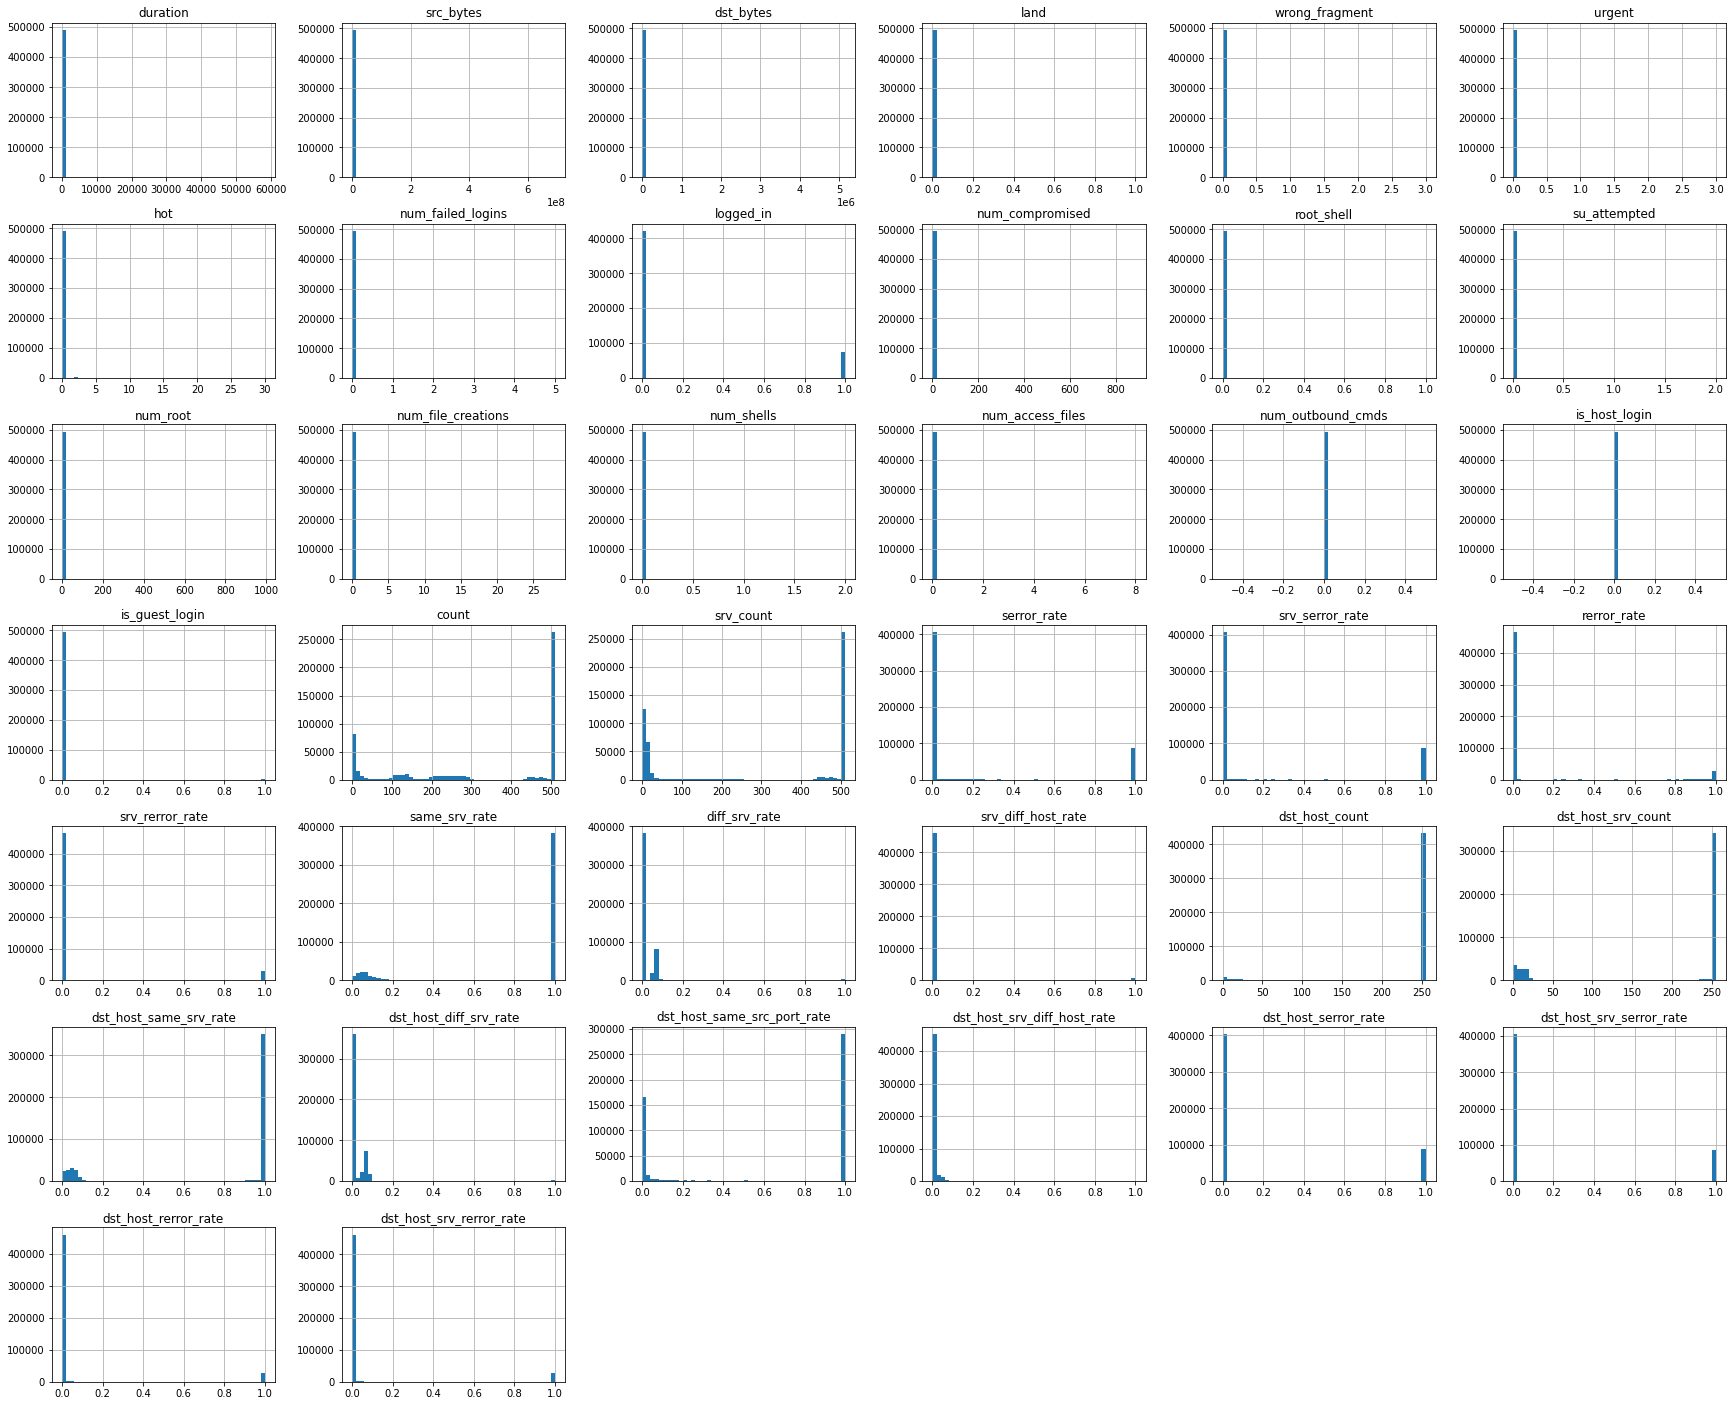

In [12]:
## Summary of the numberic attributes
df.hist(bins = 50, figsize= (30,25))
plt.show()

In [13]:
print("The category attributes: ")
df_categories =  list(set(df.columns) - set(df._get_numeric_data().columns))
df_categories

The category attributes: 


['target', 'flag', 'protocol_type', 'service', 'Attack Type']

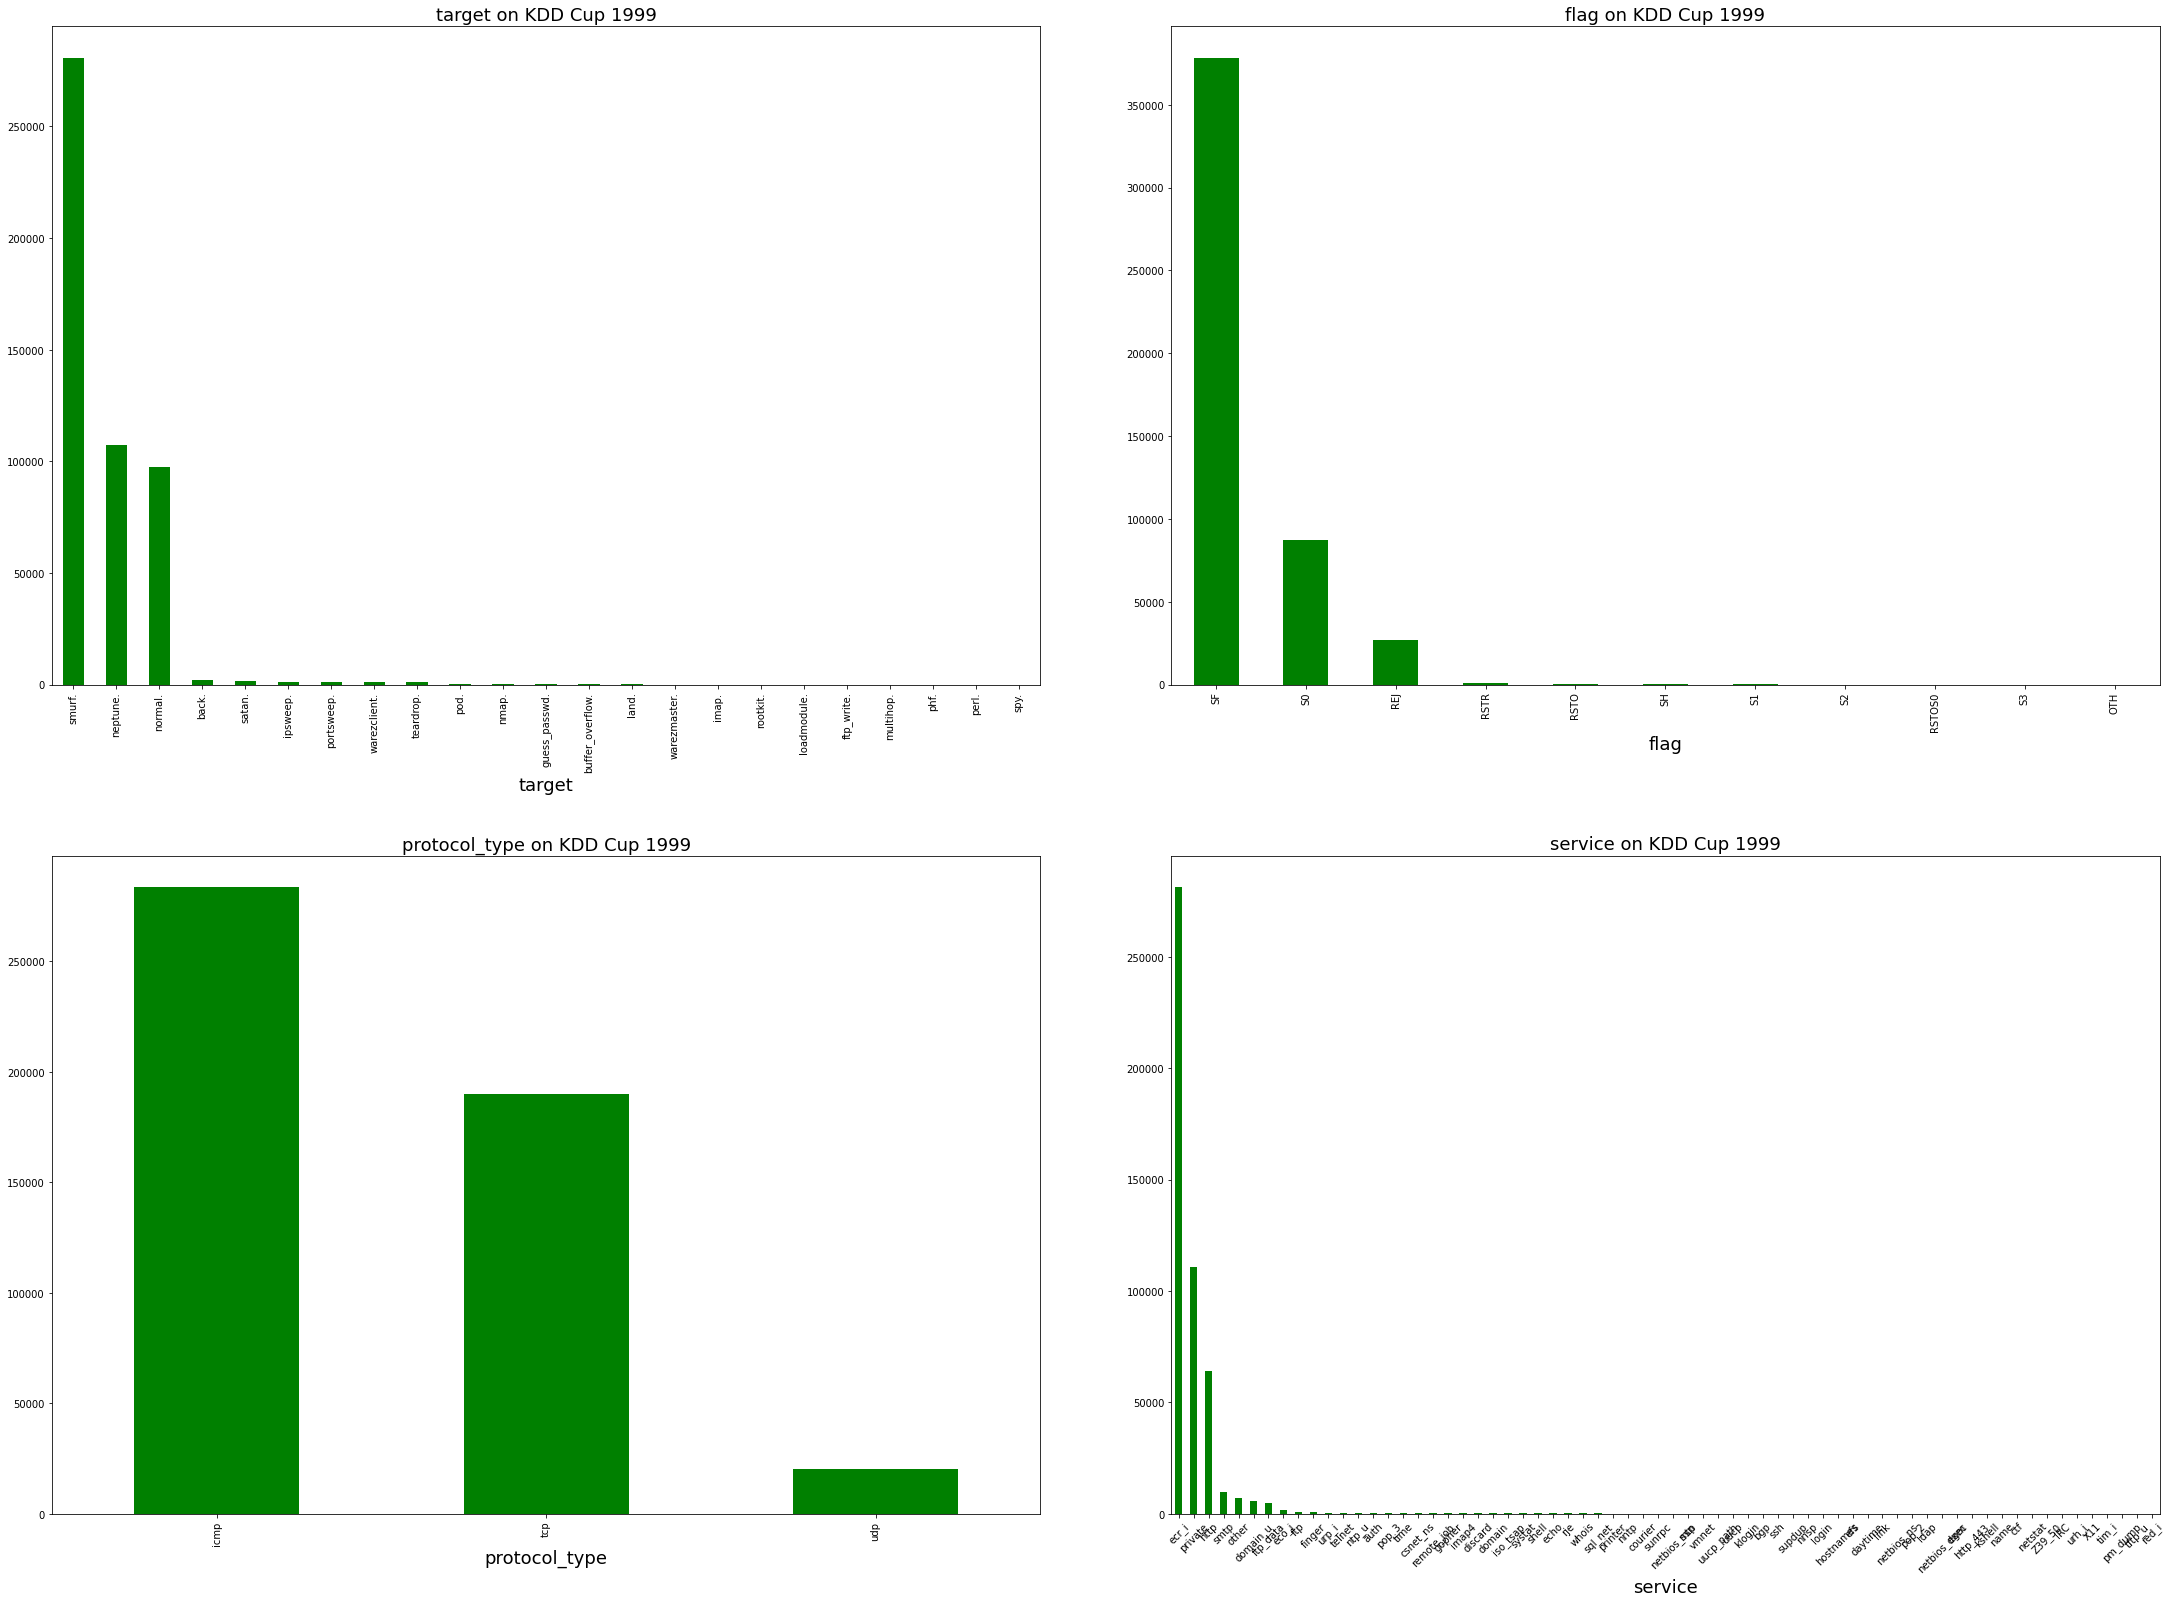

In [14]:
## Plot categories attributes
def plot_dist_categories(col, ax):
    df[col].value_counts().plot(kind='bar',facecolor='g', ax=ax)
    ax.set_xlabel('{}'.format(col), fontsize=18)
    ax.set_title("{} on KDD Cup 1999".format(col), fontsize= 18)
    plt.xticks(rotation=45)
    return ax

f, ax = plt.subplots(2,2, figsize = (30,25))
f.tight_layout(h_pad=15, w_pad=10, rect=[0, 0.08, 1, 0.93])

k = 0
for i in range(2):
    for j in range(2):
        plot_dist_categories(df_categories[k], ax[i][j])
        k += 1

plt.show()


In [15]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

In [16]:
df['Attack Type'].value_counts() / len(df)

dos       0.792391
normal    0.196911
probe     0.008313
r2l       0.002279
u2r       0.000105
Name: Attack Type, dtype: float64

### Some in-depth analysis

#### Univariable Analysis

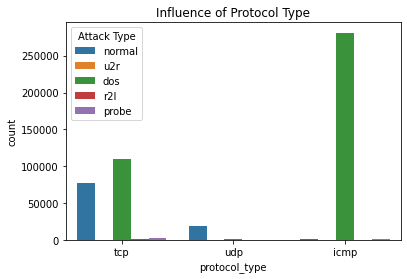

In [17]:
# Whether is the relationship between Protocol_type vs target status
sns.countplot(x = 'protocol_type',hue = "Attack Type",data = df).set(title='Influence of Protocol Type')
plt.show()

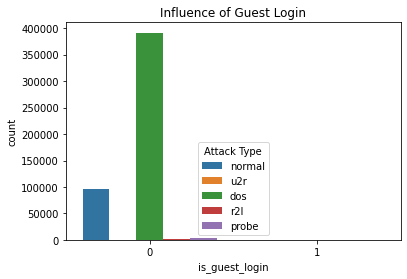

In [18]:
## Whether is the relationship between is_guess_login vs target status
sns.countplot(x = 'is_guest_login',hue = "Attack Type",data = df).set(title='Influence of Guest Login')
plt.show()

In [19]:
df['is_guest_login'].value_counts()

0    493336
1       685
Name: is_guest_login, dtype: int64

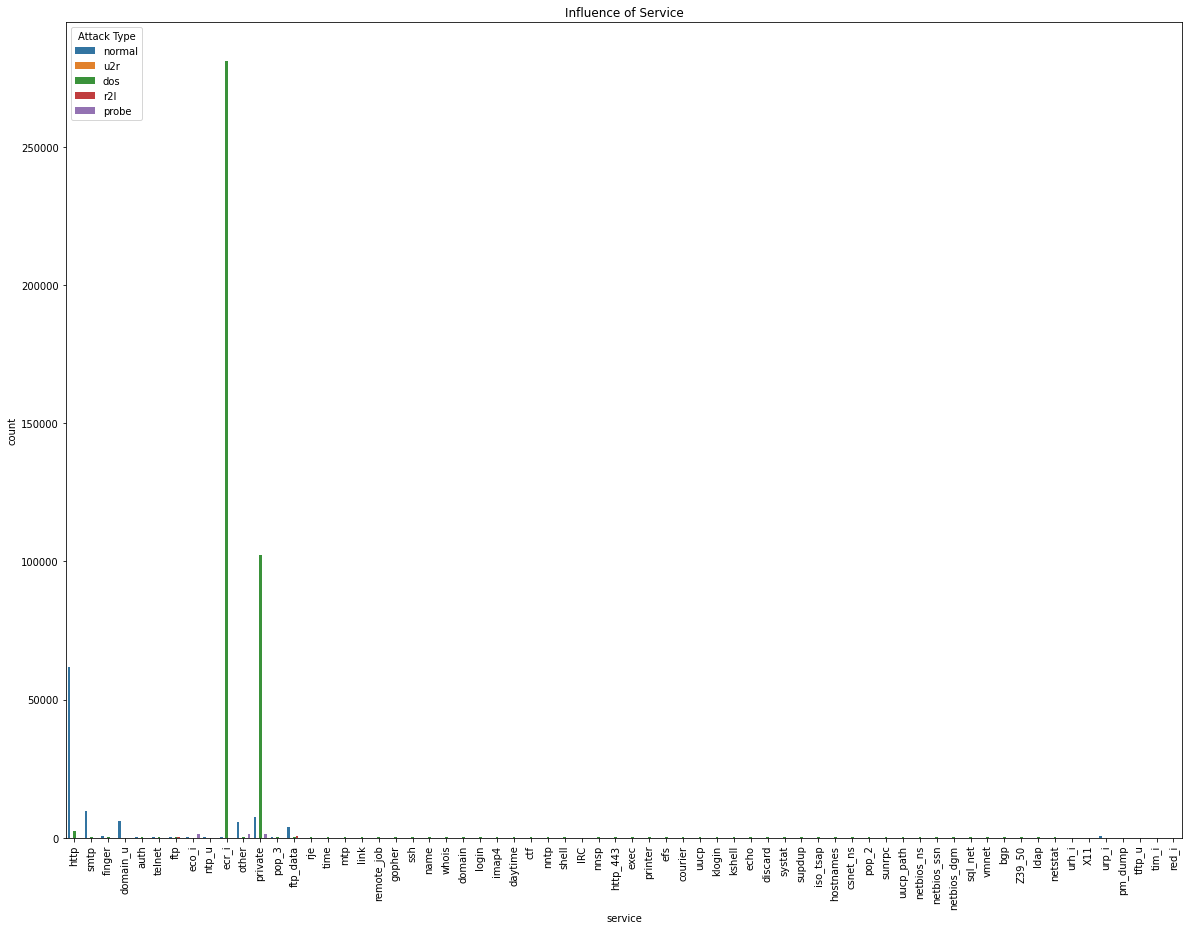

In [20]:
## How about service ? 
ax, fig = plt.subplots(figsize = (20, 15))
sns.countplot(x = 'service',hue = "Attack Type",data = df).set(title='Influence of Service')
plt.xticks(rotation=90)
plt.show()

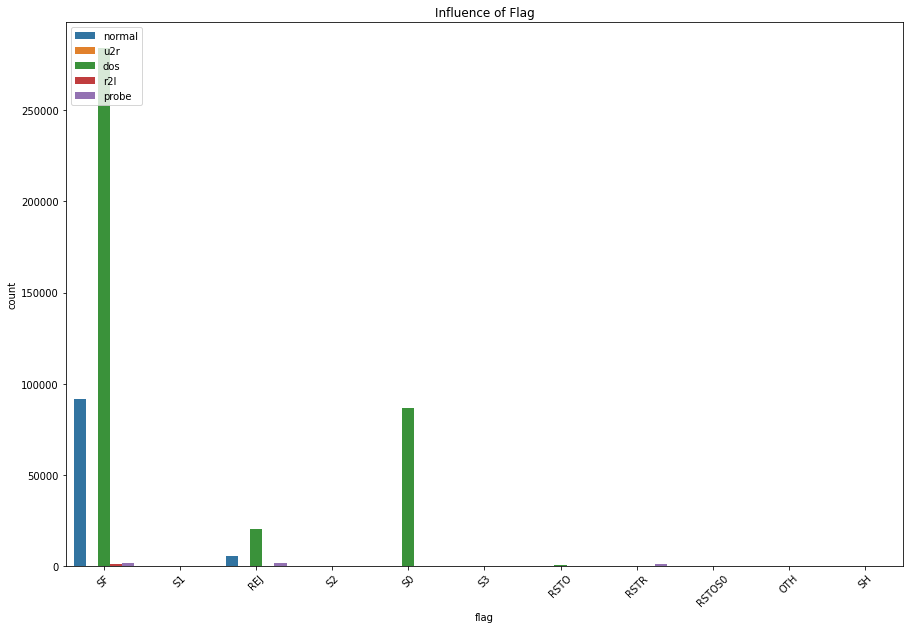

In [21]:
## Whether is the relationship between is_guess_login vs target status
ax, fig = plt.subplots(figsize = (15,10))
sns.countplot(x = 'flag',hue = "Attack Type",data = df).set(title='Influence of Flag')
plt.legend(loc = 'best')
plt.xticks(rotation = 45)
plt.show()

#### Multivariate  Analysis

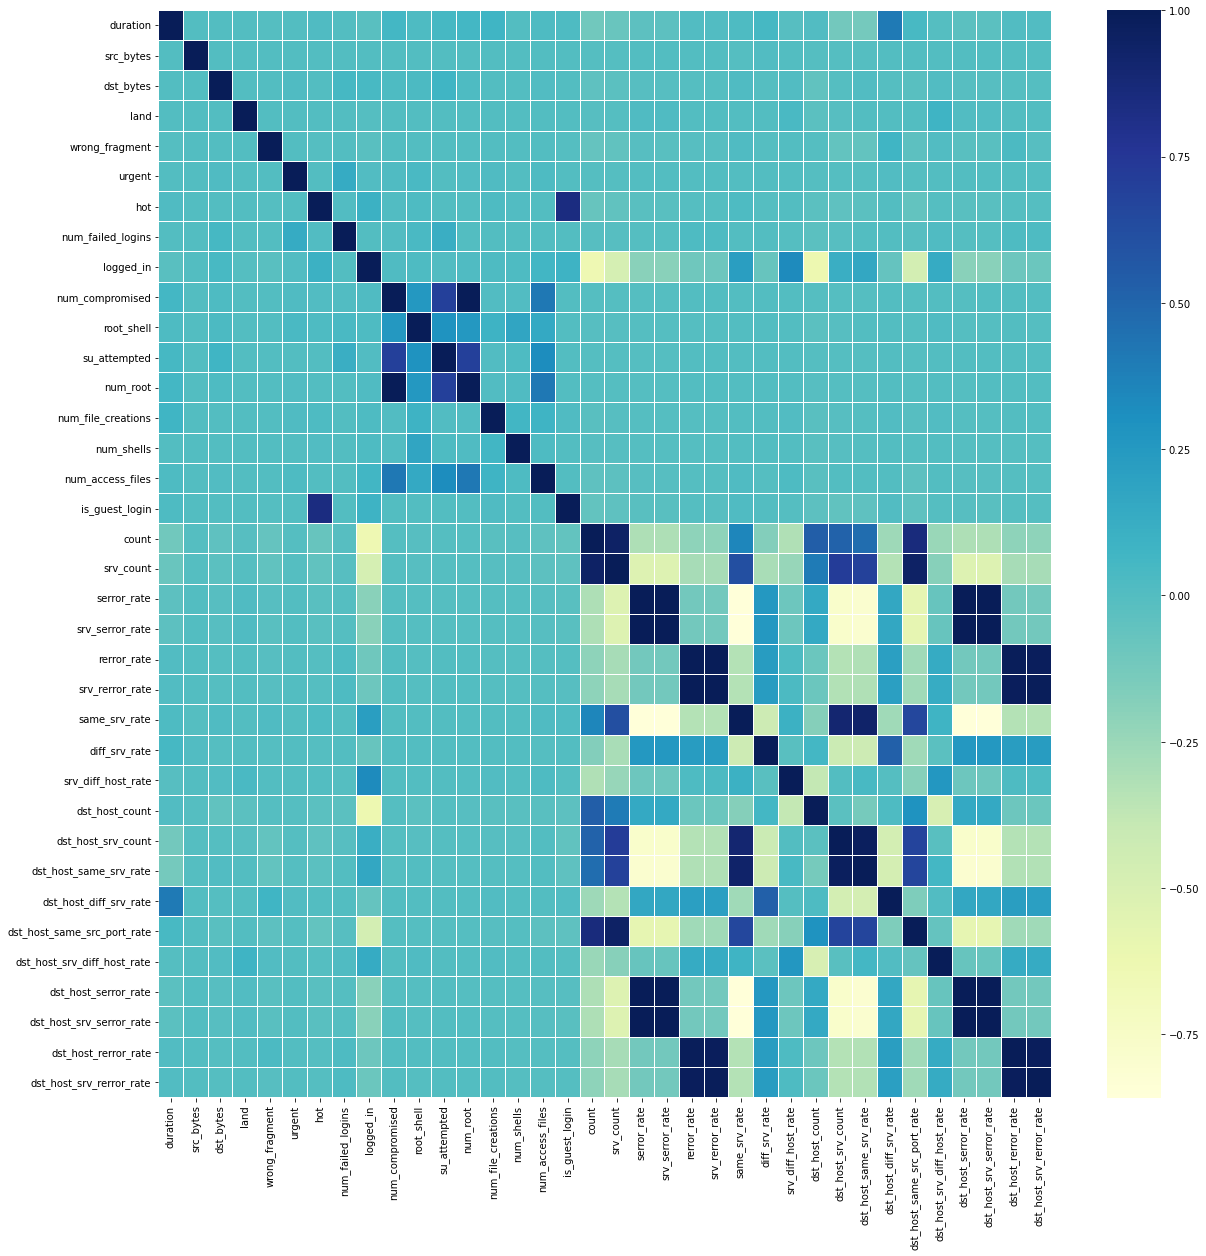

In [22]:
f, ax = plt.subplots(figsize =(20,20)) 


corr_matrix=df.drop(['num_outbound_cmds','is_host_login'],axis=1).corr()

sns.heatmap(corr_matrix,ax = ax,cmap ="YlGnBu", linewidths = 0.1)
plt.show()

In [23]:
## Check some pair of variables

In [24]:
df['num_root'].corr(df['num_compromised'])

0.9938277978737916

In [25]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.998361507272553

In [26]:
df['srv_count'].corr(df['count'])


0.9436670688882645

In [27]:
df['srv_rerror_rate'].corr(df['rerror_rate'])


0.9947309539818242

In [28]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])


0.9736854572953835

In [29]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])


0.9981559173373293

In [30]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])


0.9848038371110285

In [31]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])


0.9278080342690969

In [32]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])


0.8989546630323716

In [33]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])


0.944926367678324

In [34]:
df['dst_host_serror_rate'].corr(df['serror_rate'])


0.9986729680104371

In [35]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])


0.9865705438845764

## Data Preprocessing

### Data Cleaning

Whether there is null value

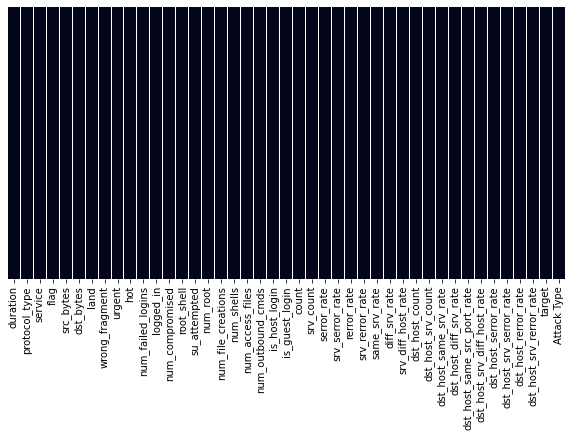

In [36]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

plt.show()

### Redundant Variables

In [37]:
#Drop columns with Nan (actually no columns have null value)
df = df.dropna('columns')

In [38]:
# Drop column with one unique value
for col in df:
    if df[col].nunique() <= 1:
      print(col)
      df.drop(col , axis = 1 , inplace= True)

num_outbound_cmds
is_host_login


In [39]:
df.shape

(494021, 41)

Drop attributes with high correlation  

In [40]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)
#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [41]:
## Checking
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [42]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate       

### Variable Transformations

In [43]:
le = LabelEncoder()
sc = StandardScaler()

In [44]:
# Encode Attack Type 
df['Attack Type']= le.fit_transform(df['Attack Type'])
df.drop('target', axis = 1, inplace=True)

In [45]:
numeric_features  = list(df._get_numeric_data().columns)
cat_features = list(set(df.columns) - set(numeric_features))
numeric_features.remove('Attack Type')
cat_features

['flag', 'service', 'protocol_type']

In [46]:
for i in cat_features:
  df[i] = le.fit_transform(df[i])

In [47]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,Attack Type
0,0,1,22,9,181,5450,0,0,0,0,...,0.0,1.0,0.0,0.0,9,9,0.0,0.11,0.0,1
1,0,1,22,9,239,486,0,0,0,0,...,0.0,1.0,0.0,0.0,19,19,0.0,0.05,0.0,1
2,0,1,22,9,235,1337,0,0,0,0,...,0.0,1.0,0.0,0.0,29,29,0.0,0.03,0.0,1
3,0,1,22,9,219,1337,0,0,0,0,...,0.0,1.0,0.0,0.0,39,39,0.0,0.03,0.0,1
4,0,1,22,9,217,2032,0,0,0,0,...,0.0,1.0,0.0,0.0,49,49,0.0,0.02,0.0,1


In [48]:
train_set, test_set = train_test_split(df,test_size=0.33,random_state=42,stratify=df['Attack Type'])

In [49]:
train_set[numeric_features] = sc.fit_transform(train_set[numeric_features])
test_set[numeric_features] = sc.transform(test_set[numeric_features])

In [50]:
train_set.iloc[0, : ]

duration                       -0.068410
protocol_type                   0.000000
service                        14.000000
flag                            9.000000
src_bytes                      -0.002212
dst_bytes                      -0.027759
land                           -0.006732
wrong_fragment                 -0.046523
urgent                          0.000000
hot                            -0.044025
num_failed_logins              -0.010254
logged_in                      -0.416599
num_compromised                -0.005549
root_shell                     -0.010284
su_attempted                   -0.005215
num_file_creations             -0.011447
num_shells                     -0.009430
num_access_files               -0.027078
is_guest_login                 -0.036815
count                           0.838613
srv_count                       0.885541
serror_rate                    -0.463623
rerror_rate                    -0.249275
same_srv_rate                   0.537229
diff_srv_rate   

In [51]:
## As we focus on the EDA so I will split the train and test right here
X_train = train_set.drop('Attack Type', axis = 1)
y_train = train_set['Attack Type']
X_test = test_set.drop('Attack Type', axis = 1)
y_test = test_set['Attack Type']

In [52]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((330994, 31), (330994,), (163027, 31), (163027,))

## Modelling and Evaluation
 **Now we have:** \\
 `X_train` : Features of Training Data \\
 `y_train` : Target Variable of Training Data \\
  `X_test` : Features of Test Data \\
 `y_test` : Target Variable of Test Data \\

### Evaluation Metrics
* First we use multiple metrics for the sake of simplicity


In [53]:
from sklearn.metrics import accuracy_score, classification_report

### Plotting Functions

In [54]:
def plot_validation_curve(train_scores, valid_scores, para_name, param_range, y_label = "RMSE score"):
  fig, ax = plt.subplots(figsize= (8, 7))

   ## abs score
  train_scores = np.abs(train_scores)
  valid_scores = np.abs(valid_scores)

  ax.plot(param_range, train_scores.mean(axis = 1), label = 'train_scores')
  ax.plot(param_range, valid_scores.mean(axis = 1), label = 'valid_scores')
  ax.set_xlabel(para_name)
  ax.set_ylabel(y_label)
  ax.set_title("Validation Curve on " + para_name )
  ax.set_xticks(param_range)
  ax.legend()
  plt.show()

def plot_learning_curve(train_sizes, train_scores, valid_scores, title = "Learning Curve",y_label = "RMSE Score"):
  fig, ax = plt.subplots(figsize = (9, 7))

  ## abs score
  train_scores = np.abs(train_scores)
  valid_scores = np.abs(valid_scores)

  ax.plot(train_sizes, train_scores.mean(axis = 1), label= 'train_scores')
  ax.plot(train_sizes, valid_scores.mean(axis = 1), label = 'valid_scores')
  ax.set_xlabel('Number of Examples')
  ax.set_ylabel(y_label)
  ax.set_title(title)
  ax.set_xticks(train_sizes)
  ax.legend()
  plt.show()

### Modelling

#### Gaussian Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
gnbModel = GaussianNB()

In [57]:
gnbModel.fit(X_train, y_train)

GaussianNB()

In [59]:
y_pred = gnbModel.predict(X_test)

In [60]:
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96    129181
           1       0.97      0.67      0.79     32102
           2       0.10      1.00      0.18      1355
           3       0.44      0.42      0.43       372
           4       0.01      0.88      0.02        17

    accuracy                           0.89    163027
   macro avg       0.50      0.78      0.48    163027
weighted avg       0.97      0.89      0.92    163027



#### Gaussian Mixture Model

In [61]:
from sklearn.mixture import GaussianMixture
gmmModel = GaussianMixture(n_components = 5, random_state= 7777)

In [62]:
gmmModel.fit(X_train, y_train)

GaussianMixture(n_components=5, random_state=7777)

In [70]:
y_pred = gmmModel.predict(X_test)

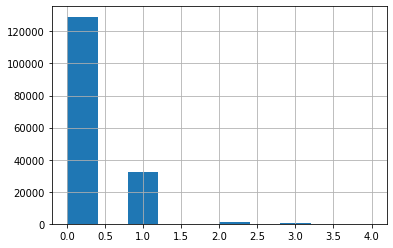

In [71]:
y_test.hist()

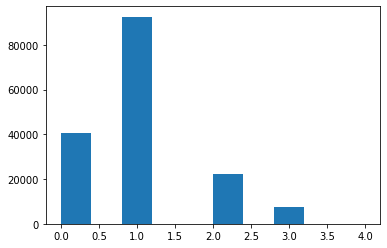

In [73]:
fig, ax = plt.subplots()
ax.hist(y_pred)
plt.show()

It's not good

#### Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
berModel = BernoulliNB()

In [ ]:
berModel.fit(X_train, y_train)

BernoulliNB()

In [ ]:
y_pred = berModel.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97    129181
           1       0.96      0.92      0.94     32102
           2       0.10      0.68      0.17      1355
           3       0.50      0.41      0.45       372
           4       0.05      0.65      0.09        17

    accuracy                           0.93    163027
   macro avg       0.52      0.72      0.52    163027
weighted avg       0.98      0.93      0.95    163027



#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lrModel = LogisticRegression()

In [ ]:
lrModel.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97    129181
           1       0.96      0.92      0.94     32102
           2       0.10      0.68      0.17      1355
           3       0.50      0.41      0.45       372
           4       0.05      0.65      0.09        17

    accuracy                           0.93    163027
   macro avg       0.52      0.72      0.52    163027
weighted avg       0.98      0.93      0.95    163027



#### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svcModel = SVC(gamma = 'scale')

In [ ]:
svcModel.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svcModel.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    129181
           1       0.99      1.00      1.00     32102
           2       0.99      0.93      0.96      1355
           3       0.94      0.79      0.86       372
           4       0.90      0.53      0.67        17

    accuracy                           1.00    163027
   macro avg       0.97      0.85      0.90    163027
weighted avg       1.00      1.00      1.00    163027



#### Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtModel = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [ ]:
dtModel.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_pred = dtModel.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    129181
           1       0.98      0.99      0.99     32102
           2       0.80      0.91      0.85      1355
           3       0.00      0.00      0.00       372
           4       0.00      0.00      0.00        17

    accuracy                           0.99    163027
   macro avg       0.56      0.58      0.57    163027
weighted avg       0.99      0.99      0.99    163027



#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfModel = RandomForestClassifier(n_jobs= -1)

In [ ]:
rfModel.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [ ]:
y_pred = rfModel.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    129181
           1       1.00      1.00      1.00     32102
           2       1.00      1.00      1.00      1355
           3       1.00      0.96      0.98       372
           4       0.87      0.76      0.81        17

    accuracy                           1.00    163027
   macro avg       0.97      0.94      0.96    163027
weighted avg       1.00      1.00      1.00    163027



#### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
gbcModel = AdaBoostClassifier()

In [ ]:
gbcModel.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
y_pred = gbcModel.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.27      0.43    129181
           1       0.24      0.95      0.39     32102
           2       0.35      0.65      0.45      1355
           3       0.85      0.51      0.64       372
           4       0.02      0.18      0.03        17

    accuracy                           0.41    163027
   macro avg       0.49      0.51      0.39    163027
weighted avg       0.85      0.41      0.42    163027

